In [1]:
%load_ext autoreload
%autoreload 2

# Commands

In [2]:
# ! pip install git+git://github.com/target/matrixprofile-ts#installation

In [3]:
# %%time
# %%capture
# ! pip install git+https://github.com/rob-med/owlpy

# Import

In [11]:
import matplotlib.pyplot as plt # grafikams
import numpy as np # skaičiavimams
import time

%%time
%%capture

# Grafikams
import mir_eval.display 
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

# Notebook audio player
import IPython.display


# Analizės įrankiai
from scipy import signal
from scipy.io import wavfile


UsageError: Line magic function `%%time` not found.


In [12]:
from core import *

In [13]:
%%capture
from main import *

# Read A, B

In [14]:
sample_rateA, samplesA = wavfile.read('audio/Debussy_Wagner - The Flying Dutchman Overture (for 2 pianos).wav')
sample_rateB, samplesB = wavfile.read('audio/Wagner - Flying Dutchman - Overture-HqezCR_XzaI.wav')

# sample_rate ---- sampling frequancy, muzikos formato dažnis, (kiek skaičių per sekundę reprezentuoja garsą)
# data --- garso takelis, [stereo :> du takeliai]

In [15]:
sample_rateA, sample_rateB
sample_rate = sample_rateA

In [16]:
sample_rate

48000

In [17]:
# pasiklausome pirmas 10s įrašo
# IPython.display.Audio(samplesA[: sample_rateA*10, 0], rate=sample_rateA) # play 10% of the track

# Mel spektrograma

In [18]:
stft_hop = int(sample_rate * 23 / 1000) # 23 ms

In [19]:
mel_A = get_mel_spectrogram(samplesA)
mel_B = get_mel_spectrogram(samplesB)

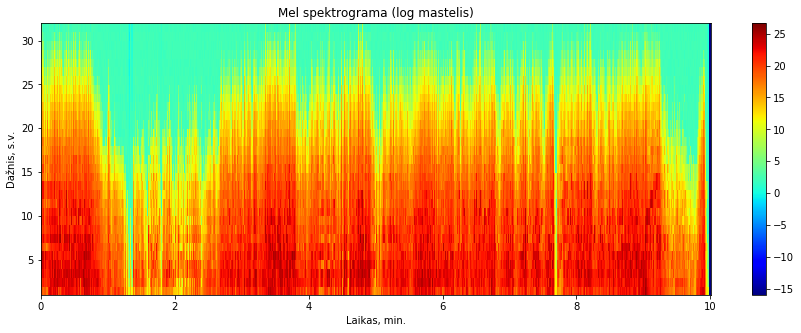

In [20]:
plot_mel_spectrogram(mel_A)

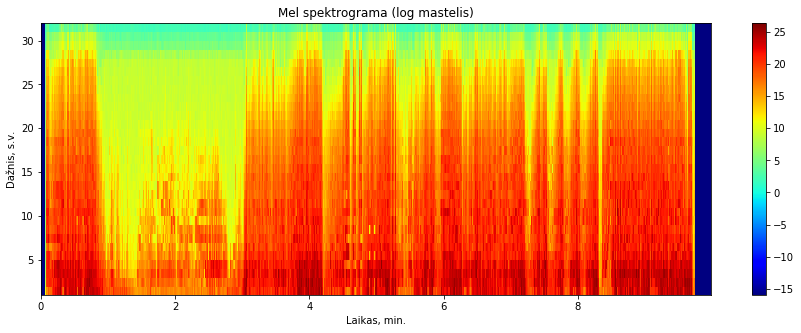

In [21]:
plot_mel_spectrogram(mel_B)

# Motyvų paieška

Naudojame laiko eilutės motyvų paieškos algoritmą:

1. Chin-Chia Michael Yeh, Yan Zhu, Liudmila Ulanova, Nurjahan Begum, Yifei Ding, Hoang Anh Dau, Diego Furtado Silva, Abdullah Mueen, Eamonn Keogh (2016). Matrix Profile I: All Pairs Similarity Joins for Time Series: A Unifying View that Includes Motifs, Discords and Shapelets. IEEE ICDM 2016

2. Matrix Profile II: Exploiting a Novel Algorithm and GPUs to break the one Hundred Million Barrier for Time Series Motifs and Joins. Yan Zhu, Zachary Zimmerman, Nader Shakibay Senobari, Chin-Chia Michael Yeh, Gareth Funning, Abdullah Mueen, Philip Berisk and Eamonn Keogh (2016). EEE ICDM 2016

3. Matrix Profile V: A Generic Technique to Incorporate Domain Knowledge into Motif Discovery. Hoang Anh Dau and Eamonn Keogh. KDD'17, Halifax, Canada.

Naudojame šio algoritmo įgyvendinimą atviro kodo python pakete: https://github.com/target/matrixprofile-ts

In [22]:
stft_hop / sample_rate # one step trukme [s]

0.023

In [23]:
sub_len = 218 # 5s trukmė mel spektrogramos žingsniais

## Apskaičiuojame Mel spektrogramos "matrix profile": motyvų paieška

In [24]:
seconds_to_steps(20)

872

In [25]:
m = 218*4 # 20s

In [26]:
m

872

In [27]:
mel_A.shape

(32, 26096)

In [ ]:
matrix_profile, mpIndex = get_m_profile(mel_A[10, :], mel_B[10, :], 400)

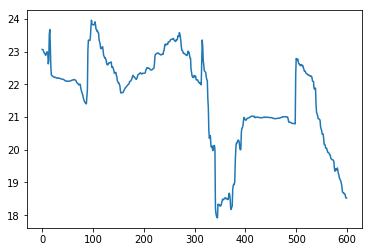

In [47]:
plt.plot(matrix_profile)

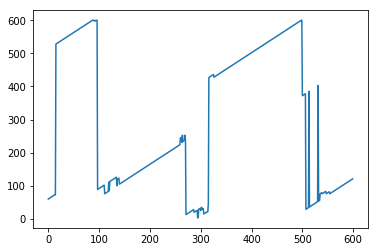

In [48]:
plt.plot(mpIndex)

# Filtering

In [49]:
idx_1, idx_2, distanceL2 = top_motifs(matrix_profile, mpIndex, N=500, min_distance=0)

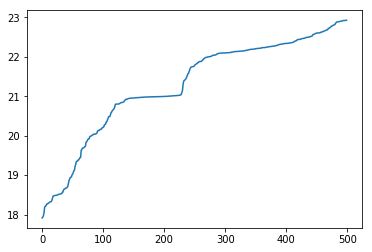

In [50]:
plt.plot(distanceL2)

In [51]:
idx_1[0]

345

In [52]:
idx_2[0]

447

In [ ]:
plt.plot( norm(mel_A[10, 1000:2000][idx_1[0]:idx_1[0]+400])  )
plt.plot( norm(mel_B[10, 1000:2000][idx_2[0]:idx_2[0]+400])  )

# Atrinkti motyvai

In [39]:
motif_len = 400

In [46]:
play_motifs(idx_1, idx_2, motif_len, samplesA, samplesB)